In [ ]:
## importing required libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## loading the red wine dataset (Kaggle dataset)

df = pd.read_csv("C:\\Users\\Prithviraj Khelkar\\Downloads\\winequality-red.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
df.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
print(df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
## lets check for missing values in the dataset

df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
## there are no missing values in the dataset
## lets check how many unique values the quality feature has
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

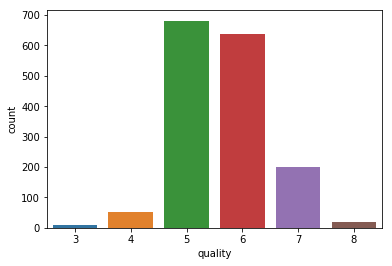

In [9]:
sns.countplot(x='quality',data=df)

In [10]:
## we observe count is maximum for quality == 5
## lets create a new discreet feature for quality from the existing quality feature

conditions = [
    (df['quality']>=7),
    (df['quality']<=4)
]
rating = ['good','bad']
df['rating']=np.select(conditions,rating,default='average')
df.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [11]:
df.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


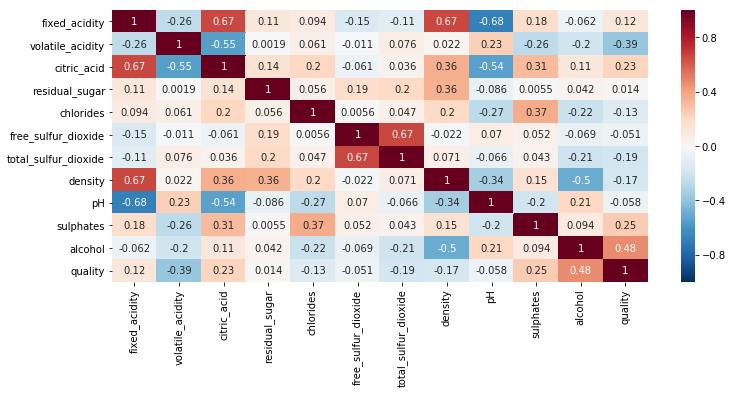

In [12]:
## lets check the correlation between features

correlation = df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")


In [13]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

[Text(0,0.5,'Alcohol Percentage'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol percentage in different wine rating types')]

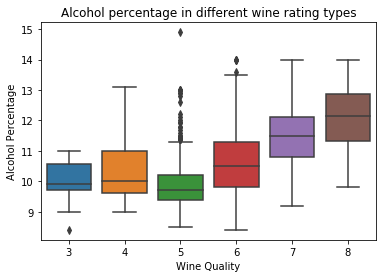

In [14]:
## we can observe that alcohol, sulphates, citric acid, and fixed acid have max correlation with feature quality.

## Analysis of Alcohol Percentage with wine quality
bx = sns.boxplot(x='quality',y='alcohol',data=df)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percentage',title='Alcohol percentage in different wine rating types')

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Sulphates in different types of Wine ratings')]

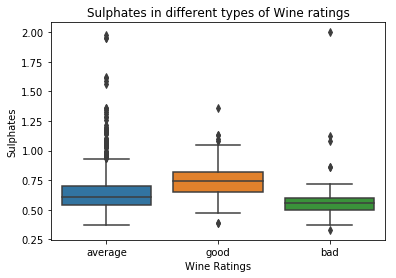

In [17]:
## Analysis of sulphates with wine quality
bx = sns.boxplot(x="rating", y='sulphates', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Citric acid in different types of Wine ratings')]

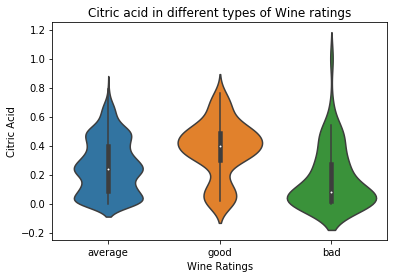

In [18]:
## analysis of citric acid with wine quality

bx = sns.violinplot(x="rating", y='citric_acid', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Citric acid in different types of Wine ratings')

[Text(0,0.5,'pH'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'pH in different types of Wine ratings')]

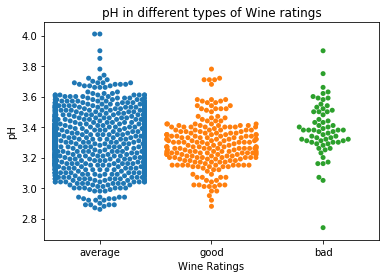

In [19]:
## Analysis of pH and wine quality

bx = sns.swarmplot(x="rating", y="pH", data = df);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

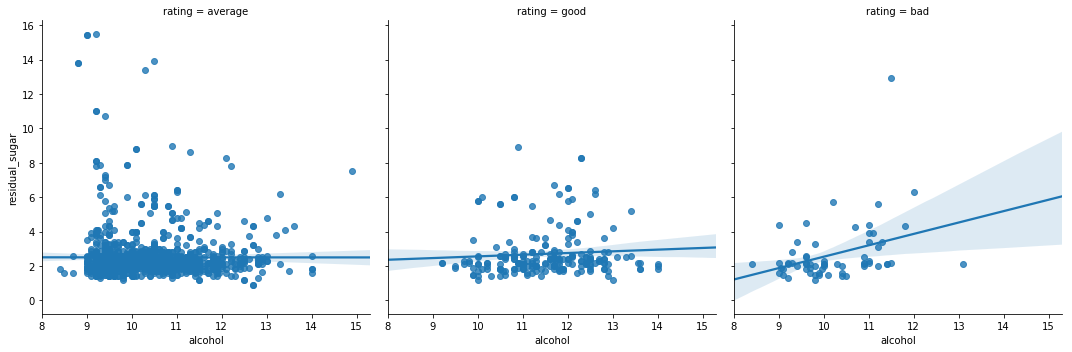

In [20]:
## Linear Regression

sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = df)

In [21]:
## The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and residual sugar content of the red wine.
## We can observe from the trendline that, for good and average wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the residual sugar content increases gradually with the increase in alcohol content.
## This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol and residual sugar content of the red wine.